In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

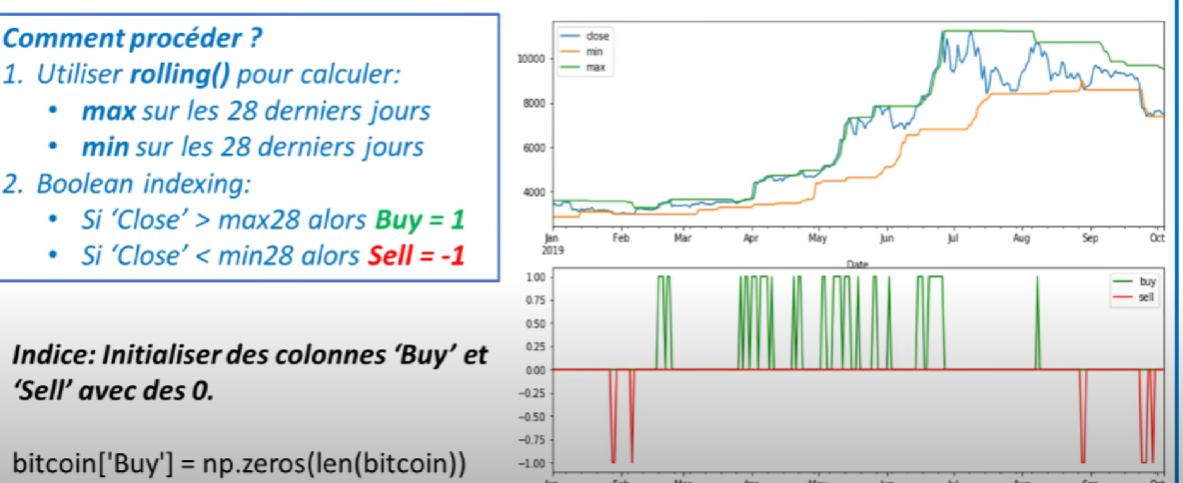

In [ ]:
bitcoin = pd.read_csv("../data/BTC-EUR.csv", index_col = "Date", parse_dates=True)

In [ ]:
price = bitcoin.loc["2019"]["Close"]


bitcoin["Buy"] = np.zeros(len(bitcoin))
bitcoin["Sell"] = np.zeros(len(bitcoin))

bitcoin["max28"] = bitcoin["Close"].shift(1).rolling(window=28).max()
bitcoin["min28"] = bitcoin["Close"].shift(1).rolling(window=28).min()


mask = bitcoin["Close"] > bitcoin["max28"]
bitcoin.loc[mask, "Buy"] = 1
mask = bitcoin["Close"] < bitcoin["min28"]
bitcoin.loc[mask, "Sell"] = -1

##Correction
#bitcoin.loc[bitcoin['RollingMax'] < bitcoin['Close'], 'Buy'] = 1
#bitcoin.loc[bitcoin['RollingMin'] > bitcoin['Close'], 'Sell'] = -1

In [ ]:
plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)
plt.plot(price, lw=2)
plt.plot(max, color="red")
plt.plot(min, color="green")
plt.subplot(2, 1, 2)
bitcoin.loc["2019"]["Buy"].plot(color="green")
bitcoin.loc["2019"]["Sell"].plot(color="red")